In [69]:
import pandas as pd
import numpy as np
import holidays
from datetime import timedelta
from holidayskr import year_holidays, is_holiday
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='Malgun Gothic')  # 한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

In [2]:
# 데이터 파일 경로 
file_paths = [
    r"C:\Users\james\J_Data_Lab\Project_KTX\data\(간선)수송-운행일-주운행(201501-202305).xlsx",
    r"C:\Users\james\J_Data_Lab\Project_KTX\data\(간선)수송-운행일-주운행(202305-202403).xlsx",
    r"C:\Users\james\J_Data_Lab\Project_KTX\data\(간선)시종착역별 열차운행(201501-202305).xlsx",
    r"C:\Users\james\J_Data_Lab\Project_KTX\data\(간선)시종착역별 열차운행(202305-202403).xlsx"
]

# 헤더 행 위치 지정
header_rows = [5, 5, 8, 8]

# 데이터프레임 로드
data_frames = []
for i, path in enumerate(file_paths):
    df = pd.read_excel(path, header=header_rows[i])  # 지정된 헤더 적용
    df.columns = df.columns.str.strip().str.replace('\n', '')  # 컬럼명 정리
    df = df.dropna(how='all').dropna(axis=1, how='all')  # 빈 행 및 열 제거
    data_frames.append(df)

# 각 데이터프레임 할당
df1, df2, df3, df4 = data_frames

C:\Users\james\anaconda3\envs\my_new_env\lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\james\anaconda3\envs\my_new_env\lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\james\anaconda3\envs\my_new_env\lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [3]:
# cpi 데이터 로드
df_cpi = pd.read_excel(r"C:\Users\james\J_Data_Lab\Project_KTX\data\korea_cpi_data.xlsx")
df_cpi.head()

,발표일,적용일,시간,실제,예측,이전
0,2024-04-02,3월,08:00:00,0.031,0.031,0.031
1,2024-03-06,2월,08:00:00,0.031,0.029,0.028
2,2024-02-02,1월,08:00:00,0.028,0.029,0.032
3,2023-12-29,12월,08:00:00,0.032,0.033,0.033
4,2023-12-05,11월,08:00:00,0.033,0.037,0.038


In [4]:
def eda_basic_info(df, df_name="DataFrame"):
    print(f"\n===== {df_name} =====")
    print("Head (5 rows):")
    display(df.head())
    
    print("\nInfo:")
    print(df.info())
    
    print("\nDescribe (numeric):")
    display(df.describe())
    
    print("\nNull counts:")
    print(df.isnull().sum())
    
    print("="*40)

In [5]:
eda_basic_info(df1, "(간선)수송-운행일-주운행(201501-202305)")


===== (간선)수송-운행일-주운행(201501-202305) =====
Head (5 rows):


,운행년월,Unnamed: 1,운행일자,운행요일구분,운행년도,주운행선,역무열차종,공급차량수,공급좌석합계수,승차수입금액,승차인원수,승차연인거리,좌석거리
0,2015년 01월,2015.01,2015년 01월 01일,목,2015년,경부선,KTX,2016,104152,3725143600,101525,288685921,440665165
1,2015년 01월,2015.01,2015년 01월 01일,목,2015년,경부선,새마을호,38,2432,66411200,3563,8543090,10746496
2,2015년 01월,2015.01,2015년 01월 01일,목,2015년,경부선,무궁화호,366,25812,518790400,65797,86492073,96079902
3,2015년 01월,2015.01,2015년 01월 01일,목,2015년,경부선,누리로,40,2630,17088900,3988,2818725,3050800
4,2015년 01월,2015.01,2015년 01월 01일,목,2015년,경부선,KTX-산천,112,5082,176309700,5142,13328413,19245897



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124066 entries, 0 to 124065
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   운행년월        124066 non-null  object 
 1   Unnamed: 1  124066 non-null  float64
 2   운행일자        124066 non-null  object 
 3   운행요일구분      124066 non-null  object 
 4   운행년도        124066 non-null  object 
 5   주운행선        124066 non-null  object 
 6   역무열차종       124066 non-null  object 
 7   공급차량수       124066 non-null  int64  
 8   공급좌석합계수     124066 non-null  int64  
 9   승차수입금액      124066 non-null  int64  
 10  승차인원수       124066 non-null  int64  
 11  승차연인거리      124066 non-null  int64  
 12  좌석거리        124066 non-null  int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 12.3+ MB
None

Describe (numeric):


,Unnamed: 1,공급차량수,공급좌석합계수,승차수입금액,승차인원수,승차연인거리,좌석거리
count,124066.000000,124066.000000,124066.000000,1.240660e+05,124066.000000,1.240660e+05,1.240660e+05
mean,2018.837668,147.965696,8077.779811,1.631611e+08,8685.540761,1.425069e+07,2.700227e+07
std,2.430618,297.313409,15626.907104,4.848822e+08,16398.018264,3.619418e+07,6.384262e+07
min,2015.010000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
25%,2017.030000,24.000000,1578.000000,9.020046e+06,1124.000000,1.243939e+06,3.113280e+06
50%,2019.030000,72.000000,4512.000000,4.265784e+07,4335.000000,5.394567e+06,1.170280e+07
75%,2021.050000,132.000000,7720.000000,1.480223e+08,9073.750000,1.362000e+07,2.593421e+07
max,2023.050000,2394.000000,124173.000000,5.774399e+09,158416.000000,4.416283e+08,5.225215e+08



Null counts:
운행년월          0
Unnamed: 1    0
운행일자          0
운행요일구분        0
운행년도          0
주운행선          0
역무열차종         0
공급차량수         0
공급좌석합계수       0
승차수입금액        0
승차인원수         0
승차연인거리        0
좌석거리          0
dtype: int64


In [6]:
eda_basic_info(df2, "(간선)수송-운행일-주운행(202305-202403)")


===== (간선)수송-운행일-주운행(202305-202403) =====
Head (5 rows):


,운행년월,Unnamed: 1,운행일자,운행요일구분,운행년도,주운행선,역무열차종,공급차량수,공급좌석합계수,승차수입금액,승차인원수,승차연인거리,좌석거리
0,2023년 05월,2023.05,2023년 05월 01일,월,2023년,경부선,KTX,1746,92507,3500920818,107396,268894697,379438263
1,2023년 05월,2023.05,2023년 05월 01일,월,2023년,경부선,무궁화호,275,17648,289344200,58958,48233263,51465856
2,2023년 05월,2023.05,2023년 05월 01일,월,2023년,경부선,누리로,8,526,348366,153,54045,607004
3,2023년 05월,2023.05,2023년 05월 01일,월,2023년,경부선,KTX-산천,16,758,38796426,1278,2853628,3220363
4,2023년 05월,2023.05,2023년 05월 01일,월,2023년,경부선,ITX-새마을,120,7520,250527560,21680,27757442,33934752



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15605 entries, 0 to 15604
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   운행년월        15605 non-null  object 
 1   Unnamed: 1  15605 non-null  float64
 2   운행일자        15605 non-null  object 
 3   운행요일구분      15605 non-null  object 
 4   운행년도        15605 non-null  object 
 5   주운행선        15605 non-null  object 
 6   역무열차종       15605 non-null  object 
 7   공급차량수       15605 non-null  int64  
 8   공급좌석합계수     15605 non-null  int64  
 9   승차수입금액      15605 non-null  int64  
 10  승차인원수       15605 non-null  int64  
 11  승차연인거리      15605 non-null  int64  
 12  좌석거리        15605 non-null  int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 1.5+ MB
None

Describe (numeric):


,Unnamed: 1,공급차량수,공급좌석합계수,승차수입금액,승차인원수,승차연인거리,좌석거리
count,15605.000000,15605.000000,15605.000000,1.560500e+04,15605.000000,1.560500e+04,1.560500e+04
mean,2023.350688,129.519257,7121.418199,1.760203e+08,8456.304966,1.438605e+07,2.323867e+07
std,0.421434,277.348798,14676.165456,5.220109e+08,16552.327753,3.811171e+07,5.939615e+07
min,2023.050000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
25%,2023.070000,24.000000,1504.000000,7.374400e+06,957.000000,9.638000e+05,2.329920e+06
50%,2023.100000,64.000000,3834.000000,3.972886e+07,4142.000000,4.896018e+06,9.328704e+06
75%,2024.010000,112.000000,6264.000000,1.663946e+08,9383.000000,1.332176e+07,2.014761e+07
max,2024.030000,2070.000000,109825.000000,4.852884e+09,142569.000000,3.509548e+08,4.496732e+08



Null counts:
운행년월          0
Unnamed: 1    0
운행일자          0
운행요일구분        0
운행년도          0
주운행선          0
역무열차종         0
공급차량수         0
공급좌석합계수       0
승차수입금액        0
승차인원수         0
승차연인거리        0
좌석거리          0
dtype: int64


In [7]:
eda_basic_info(df3, "(간선)시종착역별 열차운행(201501-202305)")


===== (간선)시종착역별 열차운행(201501-202305) =====
Head (5 rows):


,운행일자,운행요일구분,열차속성,열차구분,주운행선,시발역,종착역,상행하행구분,역무열차종,공급좌석수,설비좌석수,열차운행횟수
0,2015년 01월 01일,목,일반,확정,경부선,서울,대전,하행,KTX,931,931,1
1,2015년 01월 01일,목,일반,확정,경부선,서울,대전,하행,KTX-산천,363,363,1
2,2015년 01월 01일,목,일반,확정,경부선,서울,부산,하행,KTX,35318,35318,38
3,2015년 01월 01일,목,일반,확정,경부선,서울,부산,하행,KTX-산천,1089,1089,2
4,2015년 01월 01일,목,일반,확정,경부선,대전,서울,상행,KTX,931,931,1



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295922 entries, 0 to 295921
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   운행일자    295922 non-null  object
 1   운행요일구분  295922 non-null  object
 2   열차속성    295922 non-null  object
 3   열차구분    295922 non-null  object
 4   주운행선    295922 non-null  object
 5   시발역     295922 non-null  object
 6   종착역     295922 non-null  object
 7   상행하행구분  295922 non-null  object
 8   역무열차종   295922 non-null  object
 9   공급좌석수   295922 non-null  int64 
 10  설비좌석수   295922 non-null  int64 
 11  열차운행횟수  295922 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 27.1+ MB
None

Describe (numeric):


,공급좌석수,설비좌석수,열차운행횟수
count,295922.000000,295922.000000,295922.000000
mean,2092.507090,2096.415792,3.017883
std,5029.613246,5025.062356,5.385849
min,0.000000,56.000000,1.000000
25%,410.000000,413.000000,1.000000
50%,955.000000,960.000000,2.000000
75%,1895.000000,1910.000000,3.000000
max,49914.000000,48960.000000,52.000000



Null counts:
운행일자      0
운행요일구분    0
열차속성      0
열차구분      0
주운행선      0
시발역       0
종착역       0
상행하행구분    0
역무열차종     0
공급좌석수     0
설비좌석수     0
열차운행횟수    0
dtype: int64


In [8]:
eda_basic_info(df4, "(간선)시종착역별 열차운행(202305-202403)")


===== (간선)시종착역별 열차운행(202305-202403) =====
Head (5 rows):


,운행일자,운행요일구분,열차속성,열차구분,역무열차종,주운행선,시발역,종착역,상행하행구분,공급좌석수,설비좌석수,열차운행횟수
0,2023년 05월 01일,월,일반,확정,KTX,경부선,부산,서울,상행,2865,2880,3
1,2023년 05월 01일,월,일반,확정,KTX,경부선,부산,행신,상행,955,960,1
2,2023년 05월 01일,월,일반,확정,KTX-산천,호남선,용산,익산,하행,410,413,1
3,2023년 05월 01일,월,일반,확정,KTX-호남,경부선,부산,서울,상행,410,413,1
4,2023년 05월 01일,월,일반/관광,확정,KTX,경부선,서울,대전,하행,955,960,1



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31169 entries, 0 to 31168
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   운행일자    31169 non-null  object
 1   운행요일구분  31169 non-null  object
 2   열차속성    31169 non-null  object
 3   열차구분    31169 non-null  object
 4   역무열차종   31169 non-null  object
 5   주운행선    31169 non-null  object
 6   시발역     31169 non-null  object
 7   종착역     31169 non-null  object
 8   상행하행구분  31169 non-null  object
 9   공급좌석수   31169 non-null  int64 
 10  설비좌석수   31169 non-null  int64 
 11  열차운행횟수  31169 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 2.9+ MB
None

Describe (numeric):


,공급좌석수,설비좌석수,열차운행횟수
count,31169.000000,31169.000000,31169.000000
mean,2155.541885,2170.290738,2.951875
std,5619.483036,5652.481516,5.846113
min,379.000000,382.000000,1.000000
25%,410.000000,413.000000,1.000000
50%,955.000000,960.000000,2.000000
75%,1910.000000,1920.000000,3.000000
max,46795.000000,47040.000000,49.000000



Null counts:
운행일자      0
운행요일구분    0
열차속성      0
열차구분      0
역무열차종     0
주운행선      0
시발역       0
종착역       0
상행하행구분    0
공급좌석수     0
설비좌석수     0
열차운행횟수    0
dtype: int64


In [9]:
eda_basic_info(df_cpi, "KOREA_CPI")


===== KOREA_CPI =====
Head (5 rows):


,발표일,적용일,시간,실제,예측,이전
0,2024-04-02,3월,08:00:00,0.031,0.031,0.031
1,2024-03-06,2월,08:00:00,0.031,0.029,0.028
2,2024-02-02,1월,08:00:00,0.028,0.029,0.032
3,2023-12-29,12월,08:00:00,0.032,0.033,0.033
4,2023-12-05,11월,08:00:00,0.033,0.037,0.038



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   발표일     111 non-null    datetime64[ns]
 1   적용일     111 non-null    object        
 2   시간      110 non-null    object        
 3   실제      110 non-null    float64       
 4   예측      110 non-null    float64       
 5   이전      110 non-null    float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 5.3+ KB
None

Describe (numeric):


,발표일,실제,예측,이전
count,111,110.000000,110.000000,110.000000
mean,2019-09-02 06:42:09.729729792,0.019555,0.019500,0.019345
min,2015-02-03 00:00:00,-0.004000,-0.003000,-0.004000
25%,2017-05-17 00:00:00,0.007000,0.008000,0.007000
50%,2019-09-03 00:00:00,0.015000,0.015500,0.014500
75%,2021-12-16 12:00:00,0.027750,0.028500,0.026750
max,2024-04-02 00:00:00,0.063000,0.063000,0.063000
std,NaN,0.015856,0.015431,0.015856



Null counts:
발표일    0
적용일    0
시간     1
실제     1
예측     1
이전     1
dtype: int64


In [10]:
df1

,운행년월,Unnamed: 1,운행일자,운행요일구분,운행년도,주운행선,역무열차종,공급차량수,공급좌석합계수,승차수입금액,승차인원수,승차연인거리,좌석거리
0,2015년 01월,2015.01,2015년 01월 01일,목,2015년,경부선,KTX,2016,104152,3725143600,101525,288685921,440665165
1,2015년 01월,2015.01,2015년 01월 01일,목,2015년,경부선,새마을호,38,2432,66411200,3563,8543090,10746496
2,2015년 01월,2015.01,2015년 01월 01일,목,2015년,경부선,무궁화호,366,25812,518790400,65797,86492073,96079902
3,2015년 01월,2015.01,2015년 01월 01일,목,2015년,경부선,누리로,40,2630,17088900,3988,2818725,3050800
4,2015년 01월,2015.01,2015년 01월 01일,목,2015년,경부선,KTX-산천,112,5082,176309700,5142,13328413,19245897
...,...,...,...,...,...,...,...,...,...,...,...,...,...
124061,2023년 05월,2023.05,2023년 05월 31일,수,2023년,경전선,무궁화호,70,5016,14588218,4059,2530440,8466016
124062,2023년 05월,2023.05,2023년 05월 31일,수,2023년,경전선,KTX-산천,80,3883,154638714,5314,11640374,16945629
124063,2023년 05월,2023.05,2023년 05월 31일,수,2023년,경전선,KTX-호남,48,2460,74216340,2649,5489477,10182350
124064,2023년 05월,2023.05,2023년 05월 31일,수,2023년,공항철도,공항버스,41,984,5032500,342,0,0


In [11]:
df2

,운행년월,Unnamed: 1,운행일자,운행요일구분,운행년도,주운행선,역무열차종,공급차량수,공급좌석합계수,승차수입금액,승차인원수,승차연인거리,좌석거리
0,2023년 05월,2023.05,2023년 05월 01일,월,2023년,경부선,KTX,1746,92507,3500920818,107396,268894697,379438263
1,2023년 05월,2023.05,2023년 05월 01일,월,2023년,경부선,무궁화호,275,17648,289344200,58958,48233263,51465856
2,2023년 05월,2023.05,2023년 05월 01일,월,2023년,경부선,누리로,8,526,348366,153,54045,607004
3,2023년 05월,2023.05,2023년 05월 01일,월,2023년,경부선,KTX-산천,16,758,38796426,1278,2853628,3220363
4,2023년 05월,2023.05,2023년 05월 01일,월,2023년,경부선,ITX-새마을,120,7520,250527560,21680,27757442,33934752
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15600,2024년 03월,2024.03,2024년 03월 31일,일,2024년,경전선,새마을호,10,436,4436700,679,820348,1418308
15601,2024년 03월,2024.03,2024년 03월 31일,일,2024년,경전선,무궁화호,70,5008,31754080,7698,5292241,8450016
15602,2024년 03월,2024.03,2024년 03월 31일,일,2024년,경전선,KTX-산천,192,9158,425214500,14725,31969883,39374314
15603,2024년 03월,2024.03,2024년 03월 31일,일,2024년,공항철도,공항버스,50,1200,3864000,245,0,0


In [12]:
# 불필요한 열 제거
df1 = df1.drop(columns=['운행년월', 'Unnamed: 1'])
df2 = df2.drop(columns=['운행년월', 'Unnamed: 1'])

# '운행일자' 기준으로 2023년 5월 데이터 제거
df2 = df2[~df2['운행일자'].str.startswith('2023년 05월')]

# 두 데이터프레임 병합
df_1n2 = pd.concat([df1, df2], ignore_index=True)

# 결과 확인
print(df_1n2.info())
df_1n2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138315 entries, 0 to 138314
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   운행일자     138315 non-null  object
 1   운행요일구분   138315 non-null  object
 2   운행년도     138315 non-null  object
 3   주운행선     138315 non-null  object
 4   역무열차종    138315 non-null  object
 5   공급차량수    138315 non-null  int64 
 6   공급좌석합계수  138315 non-null  int64 
 7   승차수입금액   138315 non-null  int64 
 8   승차인원수    138315 non-null  int64 
 9   승차연인거리   138315 non-null  int64 
 10  좌석거리     138315 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 11.6+ MB
None


,운행일자,운행요일구분,운행년도,주운행선,역무열차종,공급차량수,공급좌석합계수,승차수입금액,승차인원수,승차연인거리,좌석거리
0,2015년 01월 01일,목,2015년,경부선,KTX,2016,104152,3725143600,101525,288685921,440665165
1,2015년 01월 01일,목,2015년,경부선,새마을호,38,2432,66411200,3563,8543090,10746496
2,2015년 01월 01일,목,2015년,경부선,무궁화호,366,25812,518790400,65797,86492073,96079902
3,2015년 01월 01일,목,2015년,경부선,누리로,40,2630,17088900,3988,2818725,3050800
4,2015년 01월 01일,목,2015년,경부선,KTX-산천,112,5082,176309700,5142,13328413,19245897


In [13]:
eda_basic_info(df_1n2, "KOREA_CPI")


===== KOREA_CPI =====
Head (5 rows):


,운행일자,운행요일구분,운행년도,주운행선,역무열차종,공급차량수,공급좌석합계수,승차수입금액,승차인원수,승차연인거리,좌석거리
0,2015년 01월 01일,목,2015년,경부선,KTX,2016,104152,3725143600,101525,288685921,440665165
1,2015년 01월 01일,목,2015년,경부선,새마을호,38,2432,66411200,3563,8543090,10746496
2,2015년 01월 01일,목,2015년,경부선,무궁화호,366,25812,518790400,65797,86492073,96079902
3,2015년 01월 01일,목,2015년,경부선,누리로,40,2630,17088900,3988,2818725,3050800
4,2015년 01월 01일,목,2015년,경부선,KTX-산천,112,5082,176309700,5142,13328413,19245897



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138315 entries, 0 to 138314
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   운행일자     138315 non-null  object
 1   운행요일구분   138315 non-null  object
 2   운행년도     138315 non-null  object
 3   주운행선     138315 non-null  object
 4   역무열차종    138315 non-null  object
 5   공급차량수    138315 non-null  int64 
 6   공급좌석합계수  138315 non-null  int64 
 7   승차수입금액   138315 non-null  int64 
 8   승차인원수    138315 non-null  int64 
 9   승차연인거리   138315 non-null  int64 
 10  좌석거리     138315 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 11.6+ MB
None

Describe (numeric):


,공급차량수,공급좌석합계수,승차수입금액,승차인원수,승차연인거리,좌석거리
count,138315.000000,138315.000000,1.383150e+05,138315.000000,1.383150e+05,1.383150e+05
mean,145.983552,7974.514095,1.643814e+08,8653.239193,1.425383e+07,2.660216e+07
std,295.321859,15531.711549,4.886783e+08,16404.600918,3.637958e+07,6.339734e+07
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
25%,24.000000,1536.000000,8.724934e+06,1101.000000,1.194380e+06,3.113280e+06
50%,72.000000,4512.000000,4.228571e+07,4305.000000,5.341031e+06,1.159952e+07
75%,132.000000,7704.000000,1.499542e+08,9089.500000,1.357743e+07,2.556173e+07
max,2394.000000,124173.000000,5.774399e+09,158416.000000,4.416283e+08,5.225215e+08



Null counts:
운행일자       0
운행요일구분     0
운행년도       0
주운행선       0
역무열차종      0
공급차량수      0
공급좌석합계수    0
승차수입금액     0
승차인원수      0
승차연인거리     0
좌석거리       0
dtype: int64


In [14]:
# '운행일자' 열의 문자 제거 및 datetime 형식 변환
df_1n2['운행일자'] = df_1n2['운행일자'].str.replace('년 ', '-').str.replace('월 ', '-').str.replace('일', '')
df_1n2['운행일자'] = pd.to_datetime(df_1n2['운행일자'], format='%Y-%m-%d')

# 결과 확인
print(df_1n2.info())
df_1n2[['운행일자']].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138315 entries, 0 to 138314
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   운행일자     138315 non-null  datetime64[ns]
 1   운행요일구분   138315 non-null  object        
 2   운행년도     138315 non-null  object        
 3   주운행선     138315 non-null  object        
 4   역무열차종    138315 non-null  object        
 5   공급차량수    138315 non-null  int64         
 6   공급좌석합계수  138315 non-null  int64         
 7   승차수입금액   138315 non-null  int64         
 8   승차인원수    138315 non-null  int64         
 9   승차연인거리   138315 non-null  int64         
 10  좌석거리     138315 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(4)
memory usage: 11.6+ MB
None


,운행일자
0,2015-01-01
1,2015-01-01
2,2015-01-01
3,2015-01-01
4,2015-01-01


In [15]:
df3

,운행일자,운행요일구분,열차속성,열차구분,주운행선,시발역,종착역,상행하행구분,역무열차종,공급좌석수,설비좌석수,열차운행횟수
0,2015년 01월 01일,목,일반,확정,경부선,서울,대전,하행,KTX,931,931,1
1,2015년 01월 01일,목,일반,확정,경부선,서울,대전,하행,KTX-산천,363,363,1
2,2015년 01월 01일,목,일반,확정,경부선,서울,부산,하행,KTX,35318,35318,38
3,2015년 01월 01일,목,일반,확정,경부선,서울,부산,하행,KTX-산천,1089,1089,2
4,2015년 01월 01일,목,일반,확정,경부선,대전,서울,상행,KTX,931,931,1
...,...,...,...,...,...,...,...,...,...,...,...,...
295917,2023년 05월 31일,수,일반/관광,확정,강릉선,서울,강릉,하행,KTX-이음,4953,5096,13
295918,2023년 05월 31일,수,일반/관광,확정,강릉선,행신,강릉,하행,KTX-이음,381,392,1
295919,2023년 05월 31일,수,일반/관광,확정,강릉선,동해,서울,상행,KTX-이음,1524,1568,4
295920,2023년 05월 31일,수,일반/관광,확정,강릉선,강릉,서울,상행,KTX-이음,4953,5096,13


In [16]:
df4

,운행일자,운행요일구분,열차속성,열차구분,역무열차종,주운행선,시발역,종착역,상행하행구분,공급좌석수,설비좌석수,열차운행횟수
0,2023년 05월 01일,월,일반,확정,KTX,경부선,부산,서울,상행,2865,2880,3
1,2023년 05월 01일,월,일반,확정,KTX,경부선,부산,행신,상행,955,960,1
2,2023년 05월 01일,월,일반,확정,KTX-산천,호남선,용산,익산,하행,410,413,1
3,2023년 05월 01일,월,일반,확정,KTX-호남,경부선,부산,서울,상행,410,413,1
4,2023년 05월 01일,월,일반/관광,확정,KTX,경부선,서울,대전,하행,955,960,1
...,...,...,...,...,...,...,...,...,...,...,...,...
31164,2024년 03월 31일,일,일반/관광,확정,KTX-호남,전라선,여수엑스포,용산,상행,820,826,2
31165,2024년 03월 31일,일,일반/관광,확정,KTX-호남,전라선,여수엑스포,행신,상행,1230,1239,3
31166,2024년 03월 31일,일,일반/관광,확정,KTX-호남,전라선,행신,여수엑스포,하행,1640,1652,4
31167,2024년 03월 31일,일,일반/관광,확정,KTX-호남,동해선,서울,포항,하행,820,826,2


In [17]:
# 컬럼 순서 맞추기 (df3 기준)
df4 = df4[['운행일자', '운행요일구분', '열차속성', '열차구분', '주운행선', '시발역', '종착역', '상행하행구분', '역무열차종', '공급좌석수', '설비좌석수', '열차운행횟수']]
df4

,운행일자,운행요일구분,열차속성,열차구분,주운행선,시발역,종착역,상행하행구분,역무열차종,공급좌석수,설비좌석수,열차운행횟수
0,2023년 05월 01일,월,일반,확정,경부선,부산,서울,상행,KTX,2865,2880,3
1,2023년 05월 01일,월,일반,확정,경부선,부산,행신,상행,KTX,955,960,1
2,2023년 05월 01일,월,일반,확정,호남선,용산,익산,하행,KTX-산천,410,413,1
3,2023년 05월 01일,월,일반,확정,경부선,부산,서울,상행,KTX-호남,410,413,1
4,2023년 05월 01일,월,일반/관광,확정,경부선,서울,대전,하행,KTX,955,960,1
...,...,...,...,...,...,...,...,...,...,...,...,...
31164,2024년 03월 31일,일,일반/관광,확정,전라선,여수엑스포,용산,상행,KTX-호남,820,826,2
31165,2024년 03월 31일,일,일반/관광,확정,전라선,여수엑스포,행신,상행,KTX-호남,1230,1239,3
31166,2024년 03월 31일,일,일반/관광,확정,전라선,행신,여수엑스포,하행,KTX-호남,1640,1652,4
31167,2024년 03월 31일,일,일반/관광,확정,동해선,서울,포항,하행,KTX-호남,820,826,2


In [18]:
# df4에서 2023년 5월 데이터 제외
df4 = df4[~df4['운행일자'].between('2023-05-01', '2023-05-31')]

# 데이터프레임 병합
df_3n4 = pd.concat([df3, df4], ignore_index=True)
df_3n4

,운행일자,운행요일구분,열차속성,열차구분,주운행선,시발역,종착역,상행하행구분,역무열차종,공급좌석수,설비좌석수,열차운행횟수
0,2015년 01월 01일,목,일반,확정,경부선,서울,대전,하행,KTX,931,931,1
1,2015년 01월 01일,목,일반,확정,경부선,서울,대전,하행,KTX-산천,363,363,1
2,2015년 01월 01일,목,일반,확정,경부선,서울,부산,하행,KTX,35318,35318,38
3,2015년 01월 01일,목,일반,확정,경부선,서울,부산,하행,KTX-산천,1089,1089,2
4,2015년 01월 01일,목,일반,확정,경부선,대전,서울,상행,KTX,931,931,1
...,...,...,...,...,...,...,...,...,...,...,...,...
327086,2024년 03월 31일,일,일반/관광,확정,전라선,여수엑스포,용산,상행,KTX-호남,820,826,2
327087,2024년 03월 31일,일,일반/관광,확정,전라선,여수엑스포,행신,상행,KTX-호남,1230,1239,3
327088,2024년 03월 31일,일,일반/관광,확정,전라선,행신,여수엑스포,하행,KTX-호남,1640,1652,4
327089,2024년 03월 31일,일,일반/관광,확정,동해선,서울,포항,하행,KTX-호남,820,826,2


In [19]:
# '운행일자'에서 년, 월, 일 제거 후 datetime 형식 변환
df_3n4['운행일자'] = df_3n4['운행일자'].str.replace('년 ', '-').str.replace('월 ', '-').str.replace('일', '')
df_3n4['운행일자'] = pd.to_datetime(df_3n4['운행일자'], format='%Y-%m-%d')

In [20]:
df_3n4.head()

,운행일자,운행요일구분,열차속성,열차구분,주운행선,시발역,종착역,상행하행구분,역무열차종,공급좌석수,설비좌석수,열차운행횟수
0,2015-01-01,목,일반,확정,경부선,서울,대전,하행,KTX,931,931,1
1,2015-01-01,목,일반,확정,경부선,서울,대전,하행,KTX-산천,363,363,1
2,2015-01-01,목,일반,확정,경부선,서울,부산,하행,KTX,35318,35318,38
3,2015-01-01,목,일반,확정,경부선,서울,부산,하행,KTX-산천,1089,1089,2
4,2015-01-01,목,일반,확정,경부선,대전,서울,상행,KTX,931,931,1


In [21]:
df_1n2.head()

,운행일자,운행요일구분,운행년도,주운행선,역무열차종,공급차량수,공급좌석합계수,승차수입금액,승차인원수,승차연인거리,좌석거리
0,2015-01-01,목,2015년,경부선,KTX,2016,104152,3725143600,101525,288685921,440665165
1,2015-01-01,목,2015년,경부선,새마을호,38,2432,66411200,3563,8543090,10746496
2,2015-01-01,목,2015년,경부선,무궁화호,366,25812,518790400,65797,86492073,96079902
3,2015-01-01,목,2015년,경부선,누리로,40,2630,17088900,3988,2818725,3050800
4,2015-01-01,목,2015년,경부선,KTX-산천,112,5082,176309700,5142,13328413,19245897


In [22]:
# 주운행선별 역무열차종 확인
result = df_1n2.groupby('주운행선')['역무열차종'].unique()

# 결과 출력
for line, trains in result.items():
    print(f"주운행선: {line}")
    print(f"역무열차종: {list(trains)}\n")

주운행선: 강릉선
역무열차종: ['KTX-호남', 'KTX-산천', 'KTX', 'KTX-이음']

주운행선: 경부2선
역무열차종: ['ITX-청춘']

주운행선: 경부3선
역무열차종: ['ITX-청춘']

주운행선: 경부선
역무열차종: ['KTX', '새마을호', '무궁화호', '누리로', 'KTX-산천', 'ITX-새마을', 'KTX-호남', 'ITX-청춘', 'ITX-경부', 'ITX-마음']

주운행선: 경북선
역무열차종: ['무궁화호', '새마을호']

주운행선: 경원선
역무열차종: ['새마을호', '통근열차', 'ITX-청춘']

주운행선: 경의선
역무열차종: ['새마을호', '통근열차', '무궁화호']

주운행선: 경전선
역무열차종: ['KTX', '새마을호', '무궁화호', 'KTX-산천', 'KTX-호남']

주운행선: 경춘선
역무열차종: ['ITX-청춘', '새마을호', '무궁화호']

주운행선: 공항철도
역무열차종: ['AREX직통', '공항버스']

주운행선: 구동해선
역무열차종: ['KTX-호남', 'KTX-산천', 'KTX', '무궁화호']

주운행선: 대구선
역무열차종: ['무궁화호', '새마을호', '누리로']

주운행선: 동해선
역무열차종: ['무궁화호', '새마을호', 'KTX', 'KTX-산천', 'KTX-호남', '누리로', 'ITX-마음']

주운행선: 묵호항선
역무열차종: ['새마을호']

주운행선: 미소속선
역무열차종: ['기타']

주운행선: 부전선
역무열차종: ['무궁화호']

주운행선: 안산선
역무열차종: ['새마을호']

주운행선: 영동선
역무열차종: ['새마을호', '무궁화호', '누리로']

주운행선: 장항선
역무열차종: ['새마을호', '무궁화호']

주운행선: 전라선
역무열차종: ['KTX', '새마을호', '무궁화호', 'KTX-산천', 'ITX-새마을', 'KTX-호남', '누리로', 'ITX-마음']

주운행선: 정선선
역무열차종: ['새마을호']

주운행선: 중부내륙선
역무열차종: ['KTX-이음'

In [23]:
#KTX : 기존 , KTX-산천 : 독자 기술, KTX-이음 : 차세대, KTX-호남

In [24]:
# 주운행선과 역무열차종 필터링
filtered_df = df_1n2[
    (df_1n2['주운행선'].isin(['경부선', '경전선', '동해선', '전라선', '호남선'])) &
    (df_1n2['역무열차종'].isin(['KTX', 'KTX-산천', 'KTX-이음', 'KTX-호남']))
]

# 결과 확인
filtered_df.head()
print(filtered_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 38416 entries, 0 to 138312
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   운행일자     38416 non-null  datetime64[ns]
 1   운행요일구분   38416 non-null  object        
 2   운행년도     38416 non-null  object        
 3   주운행선     38416 non-null  object        
 4   역무열차종    38416 non-null  object        
 5   공급차량수    38416 non-null  int64         
 6   공급좌석합계수  38416 non-null  int64         
 7   승차수입금액   38416 non-null  int64         
 8   승차인원수    38416 non-null  int64         
 9   승차연인거리   38416 non-null  int64         
 10  좌석거리     38416 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(4)
memory usage: 3.5+ MB
None


In [25]:
filtered_df.head()

,운행일자,운행요일구분,운행년도,주운행선,역무열차종,공급차량수,공급좌석합계수,승차수입금액,승차인원수,승차연인거리,좌석거리
0,2015-01-01,목,2015년,경부선,KTX,2016,104152,3725143600,101525,288685921,440665165
4,2015-01-01,목,2015년,경부선,KTX-산천,112,5082,176309700,5142,13328413,19245897
9,2015-01-01,목,2015년,호남선,KTX,288,14776,243662000,8832,22963515,57465746
11,2015-01-01,목,2015년,호남선,KTX-산천,208,9438,279357800,9917,25308662,37074279
13,2015-01-01,목,2015년,전라선,KTX,36,1862,54500600,1879,5035279,7824124


In [26]:
# 운행년도 열 제거
filtered_df = filtered_df.drop(columns=['운행년도'])

# 주운행선 라벨링
line_mapping = {
    '경부선': 0,
    '경전선': 1,
    '동해선': 2,
    '전라선': 3,
    '호남선': 4
}
filtered_df['주운행선'] = filtered_df['주운행선'].map(line_mapping)

# 역무열차종 라벨링
train_mapping = {
    'KTX': 0,
    'KTX-산천': 1,
    'KTX-이음': 2,
    'KTX-호남': 3
}
filtered_df['역무열차종'] = filtered_df['역무열차종'].map(train_mapping)

# 결과 확인
print(filtered_df.info())
filtered_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 38416 entries, 0 to 138312
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   운행일자     38416 non-null  datetime64[ns]
 1   운행요일구분   38416 non-null  object        
 2   주운행선     38416 non-null  int64         
 3   역무열차종    38416 non-null  int64         
 4   공급차량수    38416 non-null  int64         
 5   공급좌석합계수  38416 non-null  int64         
 6   승차수입금액   38416 non-null  int64         
 7   승차인원수    38416 non-null  int64         
 8   승차연인거리   38416 non-null  int64         
 9   좌석거리     38416 non-null  int64         
dtypes: datetime64[ns](1), int64(8), object(1)
memory usage: 3.2+ MB
None


,운행일자,운행요일구분,주운행선,역무열차종,공급차량수,공급좌석합계수,승차수입금액,승차인원수,승차연인거리,좌석거리
0,2015-01-01,목,0,0,2016,104152,3725143600,101525,288685921,440665165
4,2015-01-01,목,0,1,112,5082,176309700,5142,13328413,19245897
9,2015-01-01,목,4,0,288,14776,243662000,8832,22963515,57465746
11,2015-01-01,목,4,1,208,9438,279357800,9917,25308662,37074279
13,2015-01-01,목,3,0,36,1862,54500600,1879,5035279,7824124


In [27]:
# 운행요일구분 더미 변수 생성 (drop_first=False로 모든 요일 유지)
filtered_df = pd.get_dummies(filtered_df, columns=['운행요일구분'], drop_first=False)

# 결과 확인
print(filtered_df.info())
filtered_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 38416 entries, 0 to 138312
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   운행일자      38416 non-null  datetime64[ns]
 1   주운행선      38416 non-null  int64         
 2   역무열차종     38416 non-null  int64         
 3   공급차량수     38416 non-null  int64         
 4   공급좌석합계수   38416 non-null  int64         
 5   승차수입금액    38416 non-null  int64         
 6   승차인원수     38416 non-null  int64         
 7   승차연인거리    38416 non-null  int64         
 8   좌석거리      38416 non-null  int64         
 9   운행요일구분_금  38416 non-null  bool          
 10  운행요일구분_목  38416 non-null  bool          
 11  운행요일구분_수  38416 non-null  bool          
 12  운행요일구분_월  38416 non-null  bool          
 13  운행요일구분_일  38416 non-null  bool          
 14  운행요일구분_토  38416 non-null  bool          
 15  운행요일구분_화  38416 non-null  bool          
dtypes: bool(7), datetime64[ns](1), int64(8)
memory usage: 3.2 MB
N

,운행일자,주운행선,역무열차종,공급차량수,공급좌석합계수,승차수입금액,승차인원수,승차연인거리,좌석거리,운행요일구분_금,운행요일구분_목,운행요일구분_수,운행요일구분_월,운행요일구분_일,운행요일구분_토,운행요일구분_화
0,2015-01-01,0,0,2016,104152,3725143600,101525,288685921,440665165,False,True,False,False,False,False,False
4,2015-01-01,0,1,112,5082,176309700,5142,13328413,19245897,False,True,False,False,False,False,False
9,2015-01-01,4,0,288,14776,243662000,8832,22963515,57465746,False,True,False,False,False,False,False
11,2015-01-01,4,1,208,9438,279357800,9917,25308662,37074279,False,True,False,False,False,False,False
13,2015-01-01,3,0,36,1862,54500600,1879,5035279,7824124,False,True,False,False,False,False,False


In [28]:
df_3n4.head()

,운행일자,운행요일구분,열차속성,열차구분,주운행선,시발역,종착역,상행하행구분,역무열차종,공급좌석수,설비좌석수,열차운행횟수
0,2015-01-01,목,일반,확정,경부선,서울,대전,하행,KTX,931,931,1
1,2015-01-01,목,일반,확정,경부선,서울,대전,하행,KTX-산천,363,363,1
2,2015-01-01,목,일반,확정,경부선,서울,부산,하행,KTX,35318,35318,38
3,2015-01-01,목,일반,확정,경부선,서울,부산,하행,KTX-산천,1089,1089,2
4,2015-01-01,목,일반,확정,경부선,대전,서울,상행,KTX,931,931,1


In [29]:
# 조건 설정
condition = (
    (df_3n4['운행일자'] == '2015-01-01') &  # 운행일자 조건
    (df_3n4['주운행선'] == '호남선') &      # 주운행선 조건
    (df_3n4['역무열차종'] == 'KTX')         # 역무열차종 조건
)

# 조건을 만족하는 열차운행횟수 합계 계산
total_trips = df_3n4.loc[condition, '열차운행횟수'].sum()

# 결과 출력
print(f"조건을 만족하는 열차운행횟수 합계: {total_trips}")

조건을 만족하는 열차운행횟수 합계: 16


In [30]:
# 열차구분의 유니크 값 확인
unique_values = df_3n4['열차구분'].unique()

# 결과 출력
print("열차구분의 유니크 값:")
print(unique_values)

열차구분의 유니크 값:
['확정' '임시' '대수송']


In [31]:
# 조건 설정: 열차구분이 '대수송'인 데이터 필터링
condition = (df_3n4['열차구분'] == '대수송')

# '운행일자' 값 추출
special_days = df_3n4.loc[condition, '운행일자'].unique()

# 결과 출력
print("대수송일 날짜 목록:")
print(special_days)

# 대수송은 설날과 추석.

대수송일 날짜 목록:
<DatetimeArray>
['2015-02-17 00:00:00', '2015-02-18 00:00:00', '2015-02-19 00:00:00',
 '2015-02-20 00:00:00', '2015-02-21 00:00:00', '2015-02-22 00:00:00',
 '2015-09-25 00:00:00', '2015-09-26 00:00:00', '2015-09-27 00:00:00',
 '2015-09-28 00:00:00',
 ...
 '2023-09-29 00:00:00', '2023-09-30 00:00:00', '2023-10-01 00:00:00',
 '2023-10-02 00:00:00', '2023-10-03 00:00:00', '2024-02-08 00:00:00',
 '2024-02-09 00:00:00', '2024-02-10 00:00:00', '2024-02-11 00:00:00',
 '2024-02-12 00:00:00']
Length: 112, dtype: datetime64[ns]


In [32]:
# 열차구분의 유니크 값 확인
unique_values = df_3n4['열차속성'].unique()

# 결과 출력
print("열차속성의 유니크 값:")
print(unique_values)

열차속성의 유니크 값:
['일반' '일반/관광' '관광']


In [33]:
# 열차구분의 유니크 값 확인
unique_values = df_3n4['주운행선'].unique()

# 결과 출력
print("열차속성의 유니크 값:")
print(unique_values)

열차속성의 유니크 값:
['경부선' '호남선' '전라선' '경전선' '구동해선' '강릉선' '중앙선' '동해선' '중부내륙선']


In [34]:
# 열차구분의 유니크 값 확인
unique_values = df_3n4['역무열차종'].unique()

# 결과 출력
print("열차속성의 유니크 값:")
print(unique_values)

열차속성의 유니크 값:
['KTX' 'KTX-산천' 'KTX-호남' 'KTX-이음']


In [35]:
# '임시' 열차속성 드랍
df_3n4_filtered = df_3n4[df_3n4['열차속성'] != '임시']

# 주운행선 필터링
valid_lines = ['경부선', '경전선', '동해선', '전라선', '호남선']
df_3n4_filtered = df_3n4_filtered[df_3n4_filtered['주운행선'].isin(valid_lines)]

# 결과 확인
print(df_3n4_filtered.info())
df_3n4_filtered.head()

<class 'pandas.core.frame.DataFrame'>
Index: 281140 entries, 0 to 327090
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   운행일자    281140 non-null  datetime64[ns]
 1   운행요일구분  281140 non-null  object        
 2   열차속성    281140 non-null  object        
 3   열차구분    281140 non-null  object        
 4   주운행선    281140 non-null  object        
 5   시발역     281140 non-null  object        
 6   종착역     281140 non-null  object        
 7   상행하행구분  281140 non-null  object        
 8   역무열차종   281140 non-null  object        
 9   공급좌석수   281140 non-null  int64         
 10  설비좌석수   281140 non-null  int64         
 11  열차운행횟수  281140 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 27.9+ MB
None


,운행일자,운행요일구분,열차속성,열차구분,주운행선,시발역,종착역,상행하행구분,역무열차종,공급좌석수,설비좌석수,열차운행횟수
0,2015-01-01,목,일반,확정,경부선,서울,대전,하행,KTX,931,931,1
1,2015-01-01,목,일반,확정,경부선,서울,대전,하행,KTX-산천,363,363,1
2,2015-01-01,목,일반,확정,경부선,서울,부산,하행,KTX,35318,35318,38
3,2015-01-01,목,일반,확정,경부선,서울,부산,하행,KTX-산천,1089,1089,2
4,2015-01-01,목,일반,확정,경부선,대전,서울,상행,KTX,931,931,1


In [36]:
filtered_df.head()

,운행일자,주운행선,역무열차종,공급차량수,공급좌석합계수,승차수입금액,승차인원수,승차연인거리,좌석거리,운행요일구분_금,운행요일구분_목,운행요일구분_수,운행요일구분_월,운행요일구분_일,운행요일구분_토,운행요일구분_화
0,2015-01-01,0,0,2016,104152,3725143600,101525,288685921,440665165,False,True,False,False,False,False,False
4,2015-01-01,0,1,112,5082,176309700,5142,13328413,19245897,False,True,False,False,False,False,False
9,2015-01-01,4,0,288,14776,243662000,8832,22963515,57465746,False,True,False,False,False,False,False
11,2015-01-01,4,1,208,9438,279357800,9917,25308662,37074279,False,True,False,False,False,False,False
13,2015-01-01,3,0,36,1862,54500600,1879,5035279,7824124,False,True,False,False,False,False,False


In [37]:
# 조건 설정
condition = (
    (df_3n4_filtered['운행일자'] == '2015-01-01') &  # 운행일자 조건
    (df_3n4_filtered['주운행선'] == '경부선') &      # 주운행선 조건
    (df_3n4_filtered['시발역'] == '서울') &
    (df_3n4_filtered['종착역'] == '부산') &
    (df_3n4_filtered['역무열차종'] == 'KTX')         # 역무열차종 조건
)

# 조건을 만족하는 열차운행횟수 합계 계산
total_trips = df_3n4_filtered.loc[condition, '열차운행횟수'].sum()

# 결과 출력
print(f"조건을 만족하는 열차운행횟수 합계: {total_trips}")

조건을 만족하는 열차운행횟수 합계: 40


In [38]:
# 조건 설정
condition = (
    (df_3n4_filtered['운행일자'] == '2015-01-01') &  # 운행일자 조건
    (df_3n4_filtered['주운행선'] == '경부선') &      # 주운행선 조건
    (df_3n4_filtered['시발역'] == '서울') &
    (df_3n4_filtered['종착역'] == '부산') &
    (df_3n4_filtered['역무열차종'] == 'KTX-산천')         # 역무열차종 조건
)

# 조건을 만족하는 열차운행횟수 합계 계산
total_trips = df_3n4_filtered.loc[condition, '열차운행횟수'].sum()

# 결과 출력
print(f"조건을 만족하는 열차운행횟수 합계: {total_trips}")

조건을 만족하는 열차운행횟수 합계: 3


In [39]:
# 조건 설정: 주운행선이 '경부선'
condition = (df_3n4_filtered['주운행선'] == '경부선')

# 상행/하행 및 역무열차종 조합 추출
cases = df_3n4_filtered.loc[condition, ['상행하행구분', '역무열차종']].drop_duplicates()

# 결과 출력
print("경부선에서 상행/하행 및 역무열차종 조합:")
print(cases)

경부선에서 상행/하행 및 역무열차종 조합:
     상행하행구분   역무열차종
0        하행     KTX
1        하행  KTX-산천
4        상행     KTX
5        상행  KTX-산천
5567     상행  KTX-호남
5571     하행  KTX-호남


In [40]:
# 조건 설정: 주운행선이 '경부선'
condition = (df_3n4_filtered['주운행선'] == '경부선')

# 상행/하행, 역무열차종, 시발역, 종착역 조합 추출
cases = df_3n4_filtered.loc[condition, ['상행하행구분', '역무열차종', '시발역', '종착역']].drop_duplicates()

# 결과 출력
print("경부선에서 상행/하행, 역무열차종, 시발역, 종착역 조합:")
print(cases)

경부선에서 상행/하행, 역무열차종, 시발역, 종착역 조합:
       상행하행구분   역무열차종     시발역     종착역
0          하행     KTX      서울      대전
1          하행  KTX-산천      서울      대전
2          하행     KTX      서울      부산
3          하행  KTX-산천      서울      부산
4          상행     KTX      대전      서울
5          상행  KTX-산천      대전      서울
6          상행     KTX      대전  인천공항T1
7          상행     KTX      부산      서울
8          상행  KTX-산천      부산      서울
9          상행     KTX      부산      행신
10         상행  KTX-산천      부산      광명
11         상행     KTX      부산  인천공항T1
12         하행     KTX      행신      부산
13         하행  KTX-산천      광명      부산
14         하행     KTX  인천공항T1      부산
5566       상행     KTX      부산      광명
5567       상행  KTX-호남      부산      광명
5570       하행     KTX      광명      부산
5571       하행  KTX-호남      광명      부산
5573       하행  KTX-산천  인천공항T1      부산
15059      상행  KTX-산천      부산      행신
18408      상행  KTX-호남      부산      서울
30229      하행  KTX-호남      서울      부산
59498      상행  KTX-호남      부산  인천공항T1
59501      하행  KT

In [43]:
df_3n4_filtered

,운행일자,운행요일구분,열차속성,열차구분,주운행선,시발역,종착역,상행하행구분,역무열차종,공급좌석수,설비좌석수,열차운행횟수,조합
0,2015-01-01,목,일반,확정,경부선,서울,대전,하행,KTX,931,931,1,하행_KTX
1,2015-01-01,목,일반,확정,경부선,서울,대전,하행,KTX-산천,363,363,1,하행_KTX-산천
2,2015-01-01,목,일반,확정,경부선,서울,부산,하행,KTX,35318,35318,38,하행_KTX
3,2015-01-01,목,일반,확정,경부선,서울,부산,하행,KTX-산천,1089,1089,2,하행_KTX-산천
4,2015-01-01,목,일반,확정,경부선,대전,서울,상행,KTX,931,931,1,상행_KTX
...,...,...,...,...,...,...,...,...,...,...,...,...,...
327086,2024-03-31,일,일반/관광,확정,전라선,여수엑스포,용산,상행,KTX-호남,820,826,2,상행_KTX-호남
327087,2024-03-31,일,일반/관광,확정,전라선,여수엑스포,행신,상행,KTX-호남,1230,1239,3,상행_KTX-호남
327088,2024-03-31,일,일반/관광,확정,전라선,행신,여수엑스포,하행,KTX-호남,1640,1652,4,하행_KTX-호남
327089,2024-03-31,일,일반/관광,확정,동해선,서울,포항,하행,KTX-호남,820,826,2,하행_KTX-호남


In [44]:
# 1. 조합별 라벨 생성 (문자열 변환 후 결합)
df_3n4_filtered['조합'] = df_3n4_filtered['상행하행구분'] + '_' + df_3n4_filtered['역무열차종'].astype(str)

# 2. 운행일자별, 주운행선별, 역무열차종별 조합 카운트 계산 (열차운행횟수 합산)
count_df = df_3n4_filtered.groupby(['운행일자', '주운행선', '역무열차종', '조합'])['열차운행횟수'].sum().unstack(fill_value=0).reset_index()

# 결과 확인
print(count_df.info())
count_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38119 entries, 0 to 38118
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   운행일자       38119 non-null  datetime64[ns]
 1   주운행선       38119 non-null  object        
 2   역무열차종      38119 non-null  object        
 3   상행_KTX     38119 non-null  int64         
 4   상행_KTX-산천  38119 non-null  int64         
 5   상행_KTX-호남  38119 non-null  int64         
 6   하행_KTX     38119 non-null  int64         
 7   하행_KTX-산천  38119 non-null  int64         
 8   하행_KTX-호남  38119 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(2)
memory usage: 2.6+ MB
None


조합,운행일자,주운행선,역무열차종,상행_KTX,상행_KTX-산천,상행_KTX-호남,하행_KTX,하행_KTX-산천,하행_KTX-호남
0,2015-01-01,경부선,KTX,57,0,0,55,0,0
1,2015-01-01,경부선,KTX-산천,0,6,0,0,6,0
2,2015-01-01,경전선,KTX,4,0,0,4,0,0
3,2015-01-01,경전선,KTX-산천,0,5,0,0,5,0
4,2015-01-01,전라선,KTX,1,0,0,1,0,0


In [45]:
# 조건 설정(count_df 증명)
condition = (
    (df_3n4_filtered['운행일자'] == '2015-01-01') &  # 운행일자 조건
    (df_3n4_filtered['주운행선'] == '경부선') &      # 주운행선 조건
    (df_3n4_filtered['역무열차종'] == 'KTX') &      # 역무열차종 조건
    (df_3n4_filtered['상행하행구분'] == '하행')
)

# 조건을 만족하는 열차운행횟수 합계 계산
total_trips = df_3n4_filtered.loc[condition, '열차운행횟수'].sum()

# 결과 출력
print(f"조건을 만족하는 열차운행횟수 합계: {total_trips}")

조건을 만족하는 열차운행횟수 합계: 55


In [46]:
# 주운행선 라벨링
line_mapping = {
    '경부선': 0,
    '경전선': 1,
    '동해선': 2,
    '전라선': 3,
    '호남선': 4
}
count_df['주운행선'] = count_df['주운행선'].map(line_mapping)

# 역무열차종 라벨링
train_mapping = {
    'KTX': 0,
    'KTX-산천': 1,
    'KTX-이음': 2,
    'KTX-호남': 3
}
count_df['역무열차종'] = count_df['역무열차종'].map(train_mapping)

# filtered_df에 병합 (운행일자 + 주운행선 + 역무열차종 기준)
filtered_df = pd.merge(
    filtered_df,
    count_df,
    how='left',
    on=['운행일자', '주운행선', '역무열차종']
)

# 결과 확인
print(filtered_df.info())
filtered_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38416 entries, 0 to 38415
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   운행일자       38416 non-null  datetime64[ns]
 1   주운행선       38416 non-null  int64         
 2   역무열차종      38416 non-null  int64         
 3   공급차량수      38416 non-null  int64         
 4   공급좌석합계수    38416 non-null  int64         
 5   승차수입금액     38416 non-null  int64         
 6   승차인원수      38416 non-null  int64         
 7   승차연인거리     38416 non-null  int64         
 8   좌석거리       38416 non-null  int64         
 9   운행요일구분_금   38416 non-null  bool          
 10  운행요일구분_목   38416 non-null  bool          
 11  운행요일구분_수   38416 non-null  bool          
 12  운행요일구분_월   38416 non-null  bool          
 13  운행요일구분_일   38416 non-null  bool          
 14  운행요일구분_토   38416 non-null  bool          
 15  운행요일구분_화   38416 non-null  bool          
 16  상행_KTX     38119 non-null  float64      

,운행일자,주운행선,역무열차종,공급차량수,공급좌석합계수,승차수입금액,승차인원수,승차연인거리,좌석거리,운행요일구분_금,...,운행요일구분_월,운행요일구분_일,운행요일구분_토,운행요일구분_화,상행_KTX,상행_KTX-산천,상행_KTX-호남,하행_KTX,하행_KTX-산천,하행_KTX-호남
0,2015-01-01,0,0,2016,104152,3725143600,101525,288685921,440665165,False,...,False,False,False,False,57.0,0.0,0.0,55.0,0.0,0.0
1,2015-01-01,0,1,112,5082,176309700,5142,13328413,19245897,False,...,False,False,False,False,0.0,6.0,0.0,0.0,6.0,0.0
2,2015-01-01,4,0,288,14776,243662000,8832,22963515,57465746,False,...,False,False,False,False,8.0,0.0,0.0,8.0,0.0,0.0
3,2015-01-01,4,1,208,9438,279357800,9917,25308662,37074279,False,...,False,False,False,False,0.0,13.0,0.0,0.0,13.0,0.0
4,2015-01-01,3,0,36,1862,54500600,1879,5035279,7824124,False,...,False,False,False,False,1.0,0.0,0.0,1.0,0.0,0.0


In [47]:
eda_basic_info(filtered_df, "병합 완료")


===== 병합 완료 =====
Head (5 rows):


,운행일자,주운행선,역무열차종,공급차량수,공급좌석합계수,승차수입금액,승차인원수,승차연인거리,좌석거리,운행요일구분_금,...,운행요일구분_월,운행요일구분_일,운행요일구분_토,운행요일구분_화,상행_KTX,상행_KTX-산천,상행_KTX-호남,하행_KTX,하행_KTX-산천,하행_KTX-호남
0,2015-01-01,0,0,2016,104152,3725143600,101525,288685921,440665165,False,...,False,False,False,False,57.0,0.0,0.0,55.0,0.0,0.0
1,2015-01-01,0,1,112,5082,176309700,5142,13328413,19245897,False,...,False,False,False,False,0.0,6.0,0.0,0.0,6.0,0.0
2,2015-01-01,4,0,288,14776,243662000,8832,22963515,57465746,False,...,False,False,False,False,8.0,0.0,0.0,8.0,0.0,0.0
3,2015-01-01,4,1,208,9438,279357800,9917,25308662,37074279,False,...,False,False,False,False,0.0,13.0,0.0,0.0,13.0,0.0
4,2015-01-01,3,0,36,1862,54500600,1879,5035279,7824124,False,...,False,False,False,False,1.0,0.0,0.0,1.0,0.0,0.0



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38416 entries, 0 to 38415
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   운행일자       38416 non-null  datetime64[ns]
 1   주운행선       38416 non-null  int64         
 2   역무열차종      38416 non-null  int64         
 3   공급차량수      38416 non-null  int64         
 4   공급좌석합계수    38416 non-null  int64         
 5   승차수입금액     38416 non-null  int64         
 6   승차인원수      38416 non-null  int64         
 7   승차연인거리     38416 non-null  int64         
 8   좌석거리       38416 non-null  int64         
 9   운행요일구분_금   38416 non-null  bool          
 10  운행요일구분_목   38416 non-null  bool          
 11  운행요일구분_수   38416 non-null  bool          
 12  운행요일구분_월   38416 non-null  bool          
 13  운행요일구분_일   38416 non-null  bool          
 14  운행요일구분_토   38416 non-null  bool          
 15  운행요일구분_화   38416 non-null  bool          
 16  상행_KTX     38119 non-null  float6

,운행일자,주운행선,역무열차종,공급차량수,공급좌석합계수,승차수입금액,승차인원수,승차연인거리,좌석거리,상행_KTX,상행_KTX-산천,상행_KTX-호남,하행_KTX,하행_KTX-산천,하행_KTX-호남
count,38416,38416.000000,38416.000000,38416.000000,38416.000000,3.841600e+04,38416.000000,3.841600e+04,3.841600e+04,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000
mean,2019-12-17 06:59:13.519366912,2.044955,1.139369,303.709626,15684.878384,4.517961e+08,13754.957153,3.326658e+07,6.182887e+07,6.888664,3.018521,0.867179,6.787744,3.005089,0.869278
min,2015-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2017-07-17 00:00:00,1.000000,0.000000,64.000000,3280.000000,1.068817e+08,3406.750000,7.924979e+06,1.355993e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2020-02-09 00:00:00,2.000000,1.000000,128.000000,6140.000000,1.955657e+08,6422.500000,1.465825e+07,2.542900e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2022-06-22 06:00:00,4.000000,3.000000,224.000000,11460.000000,3.232581e+08,10377.250000,2.386877e+07,4.837648e+07,6.000000,6.000000,0.000000,6.000000,6.000000,0.000000
max,2024-03-31 00:00:00,4.000000,3.000000,2394.000000,124173.000000,5.774399e+09,158416.000000,4.416283e+08,5.225215e+08,116.000000,24.000000,15.000000,114.000000,26.000000,15.000000
std,NaN,1.551774,1.171995,507.013050,26747.721171,8.529488e+08,24700.056541,6.265189e+07,1.096667e+08,15.190633,4.555322,1.996038,14.831737,4.539515,2.008362



Null counts:
운행일자           0
주운행선           0
역무열차종          0
공급차량수          0
공급좌석합계수        0
승차수입금액         0
승차인원수          0
승차연인거리         0
좌석거리           0
운행요일구분_금       0
운행요일구분_목       0
운행요일구분_수       0
운행요일구분_월       0
운행요일구분_일       0
운행요일구분_토       0
운행요일구분_화       0
상행_KTX       297
상행_KTX-산천    297
상행_KTX-호남    297
하행_KTX       297
하행_KTX-산천    297
하행_KTX-호남    297
dtype: int64


In [51]:
# 1. 상행/하행 조합 열 목록 추출
count_columns = ['상행_KTX', '상행_KTX-산천', '상행_KTX-호남',
                 '하행_KTX', '하행_KTX-산천', '하행_KTX-호남']

# 2. 결측치 확인 및 필터링
missing_rows = filtered_df[filtered_df[count_columns].isnull().any(axis=1)]

# 3. 주운행선과 역무열차종 출력
result = missing_rows[['운행일자','주운행선', '역무열차종']].drop_duplicates()

# 결과 확인
print("결측치가 있는 주운행선과 역무열차종:")
print(result)


결측치가 있는 주운행선과 역무열차종:
            운행일자  주운행선  역무열차종
12    2015-01-02     3      0
36    2015-01-05     3      0
44    2015-01-06     3      0
52    2015-01-07     3      0
60    2015-01-08     3      0
...          ...   ...    ...
37291 2024-01-11     1      3
37306 2024-01-12     1      3
37349 2024-01-15     1      3
37364 2024-01-16     1      3
37379 2024-01-17     1      3

[297 rows x 3 columns]


In [54]:
# 1. 상행/하행 조합 열 목록 추출
count_columns = ['상행_KTX', '상행_KTX-산천', '상행_KTX-호남',
                 '하행_KTX', '하행_KTX-산천', '하행_KTX-호남']

# 2. 결측치 확인 및 필터링
missing_rows = filtered_df[filtered_df[count_columns].isnull().any(axis=1)]

# 3. 주운행선과 역무열차종 출력
result = missing_rows[['주운행선', '역무열차종']].drop_duplicates()

# 결과 확인
print("결측치가 있는 주운행선과 역무열차종:")
print(result)


결측치가 있는 주운행선과 역무열차종:
       주운행선  역무열차종
12        3      0
672       0      3
24484     1      3
26428     2      3
26440     3      3
30872     4      3


In [57]:
# 결측치 증명
condition = (
    (df_3n4_filtered['운행일자'] == '2015-01-11') &  # 운행일자 조건
    (df_3n4_filtered['주운행선'] == '경전선') &      # 주운행선 조건
    (df_3n4_filtered['역무열차종'] == 'KTX-호남') &      # 역무열차종 조건
    (df_3n4_filtered['상행하행구분'] == '하행')
)

# 조건을 만족하는 열차운행횟수 합계 계산
total_trips = df_3n4_filtered.loc[condition, '열차운행횟수'].sum()

# 결과 출력
print(f"조건을 만족하는 열차운행횟수 합계: {total_trips}")

조건을 만족하는 열차운행횟수 합계: 0


In [58]:
# 결측치 0으로 처리
filtered_df = filtered_df.fillna(0)

eda_basic_info(filtered_df, "병합")


===== 병합 =====
Head (5 rows):


,운행일자,주운행선,역무열차종,공급차량수,공급좌석합계수,승차수입금액,승차인원수,승차연인거리,좌석거리,운행요일구분_금,...,운행요일구분_월,운행요일구분_일,운행요일구분_토,운행요일구분_화,상행_KTX,상행_KTX-산천,상행_KTX-호남,하행_KTX,하행_KTX-산천,하행_KTX-호남
0,2015-01-01,0,0,2016,104152,3725143600,101525,288685921,440665165,False,...,False,False,False,False,57.0,0.0,0.0,55.0,0.0,0.0
1,2015-01-01,0,1,112,5082,176309700,5142,13328413,19245897,False,...,False,False,False,False,0.0,6.0,0.0,0.0,6.0,0.0
2,2015-01-01,4,0,288,14776,243662000,8832,22963515,57465746,False,...,False,False,False,False,8.0,0.0,0.0,8.0,0.0,0.0
3,2015-01-01,4,1,208,9438,279357800,9917,25308662,37074279,False,...,False,False,False,False,0.0,13.0,0.0,0.0,13.0,0.0
4,2015-01-01,3,0,36,1862,54500600,1879,5035279,7824124,False,...,False,False,False,False,1.0,0.0,0.0,1.0,0.0,0.0



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38416 entries, 0 to 38415
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   운행일자       38416 non-null  datetime64[ns]
 1   주운행선       38416 non-null  int64         
 2   역무열차종      38416 non-null  int64         
 3   공급차량수      38416 non-null  int64         
 4   공급좌석합계수    38416 non-null  int64         
 5   승차수입금액     38416 non-null  int64         
 6   승차인원수      38416 non-null  int64         
 7   승차연인거리     38416 non-null  int64         
 8   좌석거리       38416 non-null  int64         
 9   운행요일구분_금   38416 non-null  bool          
 10  운행요일구분_목   38416 non-null  bool          
 11  운행요일구분_수   38416 non-null  bool          
 12  운행요일구분_월   38416 non-null  bool          
 13  운행요일구분_일   38416 non-null  bool          
 14  운행요일구분_토   38416 non-null  bool          
 15  운행요일구분_화   38416 non-null  bool          
 16  상행_KTX     38416 non-null  float6

,운행일자,주운행선,역무열차종,공급차량수,공급좌석합계수,승차수입금액,승차인원수,승차연인거리,좌석거리,상행_KTX,상행_KTX-산천,상행_KTX-호남,하행_KTX,하행_KTX-산천,하행_KTX-호남
count,38416,38416.000000,38416.000000,38416.000000,38416.000000,3.841600e+04,38416.000000,3.841600e+04,3.841600e+04,38416.000000,38416.000000,38416.000000,38416.000000,38416.000000,38416.000000
mean,2019-12-17 06:59:13.519366912,2.044955,1.139369,303.709626,15684.878384,4.517961e+08,13754.957153,3.326658e+07,6.182887e+07,6.835407,2.995184,0.860475,6.735267,2.981857,0.862557
min,2015-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2017-07-17 00:00:00,1.000000,0.000000,64.000000,3280.000000,1.068817e+08,3406.750000,7.924979e+06,1.355993e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2020-02-09 00:00:00,2.000000,1.000000,128.000000,6140.000000,1.955657e+08,6422.500000,1.465825e+07,2.542900e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2022-06-22 06:00:00,4.000000,3.000000,224.000000,11460.000000,3.232581e+08,10377.250000,2.386877e+07,4.837648e+07,6.000000,6.000000,0.000000,6.000000,6.000000,0.000000
max,2024-03-31 00:00:00,4.000000,3.000000,2394.000000,124173.000000,5.774399e+09,158416.000000,4.416283e+08,5.225215e+08,116.000000,24.000000,15.000000,114.000000,26.000000,15.000000
std,NaN,1.551774,1.171995,507.013050,26747.721171,8.529488e+08,24700.056541,6.265189e+07,1.096667e+08,15.143821,4.545374,1.989757,14.786248,4.529586,2.002031



Null counts:
운행일자         0
주운행선         0
역무열차종        0
공급차량수        0
공급좌석합계수      0
승차수입금액       0
승차인원수        0
승차연인거리       0
좌석거리         0
운행요일구분_금     0
운행요일구분_목     0
운행요일구분_수     0
운행요일구분_월     0
운행요일구분_일     0
운행요일구분_토     0
운행요일구분_화     0
상행_KTX       0
상행_KTX-산천    0
상행_KTX-호남    0
하행_KTX       0
하행_KTX-산천    0
하행_KTX-호남    0
dtype: int64


In [61]:
# 공휴일 여부 변수 생성
filtered_df['공휴일여부'] = filtered_df['운행일자'].apply(lambda x: 1 if is_holiday(x.strftime('%Y-%m-%d')) else 0)

# 평일/주말 변수 생성
filtered_df['평일'] = filtered_df['운행요일구분_월'] | filtered_df['운행요일구분_화'] | \
                      filtered_df['운행요일구분_수'] | filtered_df['운행요일구분_목']

filtered_df['주말'] = filtered_df['운행요일구분_금'] | filtered_df['운행요일구분_토'] | \
                      filtered_df['운행요일구분_일']

# 결과 확인
print(filtered_df.info())
filtered_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38416 entries, 0 to 38415
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   운행일자       38416 non-null  datetime64[ns]
 1   주운행선       38416 non-null  int64         
 2   역무열차종      38416 non-null  int64         
 3   공급차량수      38416 non-null  int64         
 4   공급좌석합계수    38416 non-null  int64         
 5   승차수입금액     38416 non-null  int64         
 6   승차인원수      38416 non-null  int64         
 7   승차연인거리     38416 non-null  int64         
 8   좌석거리       38416 non-null  int64         
 9   운행요일구분_금   38416 non-null  bool          
 10  운행요일구분_목   38416 non-null  bool          
 11  운행요일구분_수   38416 non-null  bool          
 12  운행요일구분_월   38416 non-null  bool          
 13  운행요일구분_일   38416 non-null  bool          
 14  운행요일구분_토   38416 non-null  bool          
 15  운행요일구분_화   38416 non-null  bool          
 16  상행_KTX     38416 non-null  float64      

,운행일자,주운행선,역무열차종,공급차량수,공급좌석합계수,승차수입금액,승차인원수,승차연인거리,좌석거리,운행요일구분_금,...,운행요일구분_화,상행_KTX,상행_KTX-산천,상행_KTX-호남,하행_KTX,하행_KTX-산천,하행_KTX-호남,공휴일여부,평일,주말
0,2015-01-01,0,0,2016,104152,3725143600,101525,288685921,440665165,False,...,False,57.0,0.0,0.0,55.0,0.0,0.0,1,True,False
1,2015-01-01,0,1,112,5082,176309700,5142,13328413,19245897,False,...,False,0.0,6.0,0.0,0.0,6.0,0.0,1,True,False
2,2015-01-01,4,0,288,14776,243662000,8832,22963515,57465746,False,...,False,8.0,0.0,0.0,8.0,0.0,0.0,1,True,False
3,2015-01-01,4,1,208,9438,279357800,9917,25308662,37074279,False,...,False,0.0,13.0,0.0,0.0,13.0,0.0,1,True,False
4,2015-01-01,3,0,36,1862,54500600,1879,5035279,7824124,False,...,False,1.0,0.0,0.0,1.0,0.0,0.0,1,True,False


In [62]:
filtered_df

,운행일자,주운행선,역무열차종,공급차량수,공급좌석합계수,승차수입금액,승차인원수,승차연인거리,좌석거리,운행요일구분_금,...,운행요일구분_화,상행_KTX,상행_KTX-산천,상행_KTX-호남,하행_KTX,하행_KTX-산천,하행_KTX-호남,공휴일여부,평일,주말
0,2015-01-01,0,0,2016,104152,3725143600,101525,288685921,440665165,False,...,False,57.0,0.0,0.0,55.0,0.0,0.0,1,True,False
1,2015-01-01,0,1,112,5082,176309700,5142,13328413,19245897,False,...,False,0.0,6.0,0.0,0.0,6.0,0.0,1,True,False
2,2015-01-01,4,0,288,14776,243662000,8832,22963515,57465746,False,...,False,8.0,0.0,0.0,8.0,0.0,0.0,1,True,False
3,2015-01-01,4,1,208,9438,279357800,9917,25308662,37074279,False,...,False,0.0,13.0,0.0,0.0,13.0,0.0,1,True,False
4,2015-01-01,3,0,36,1862,54500600,1879,5035279,7824124,False,...,False,1.0,0.0,0.0,1.0,0.0,0.0,1,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38411,2024-03-31,2,0,108,5730,207982728,7169,14516692,21314645,False,...,False,3.0,0.0,0.0,3.0,0.0,0.0,0,False,True
38412,2024-03-31,2,1,176,8338,348627630,12278,24338423,31091265,False,...,False,0.0,11.0,0.0,0.0,11.0,0.0,0,False,True
38413,2024-03-31,2,3,32,1640,77434004,2571,5292330,6059800,False,...,False,0.0,0.0,2.0,0.0,0.0,2.0,0,False,True
38414,2024-03-31,1,0,216,11460,491723566,15533,36739684,48564615,False,...,False,6.0,0.0,0.0,6.0,0.0,0.0,0,False,True


In [63]:
eda_basic_info(filtered_df, "최종 확인")


===== 최종 확인 =====
Head (5 rows):


,운행일자,주운행선,역무열차종,공급차량수,공급좌석합계수,승차수입금액,승차인원수,승차연인거리,좌석거리,운행요일구분_금,...,운행요일구분_화,상행_KTX,상행_KTX-산천,상행_KTX-호남,하행_KTX,하행_KTX-산천,하행_KTX-호남,공휴일여부,평일,주말
0,2015-01-01,0,0,2016,104152,3725143600,101525,288685921,440665165,False,...,False,57.0,0.0,0.0,55.0,0.0,0.0,1,True,False
1,2015-01-01,0,1,112,5082,176309700,5142,13328413,19245897,False,...,False,0.0,6.0,0.0,0.0,6.0,0.0,1,True,False
2,2015-01-01,4,0,288,14776,243662000,8832,22963515,57465746,False,...,False,8.0,0.0,0.0,8.0,0.0,0.0,1,True,False
3,2015-01-01,4,1,208,9438,279357800,9917,25308662,37074279,False,...,False,0.0,13.0,0.0,0.0,13.0,0.0,1,True,False
4,2015-01-01,3,0,36,1862,54500600,1879,5035279,7824124,False,...,False,1.0,0.0,0.0,1.0,0.0,0.0,1,True,False



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38416 entries, 0 to 38415
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   운행일자       38416 non-null  datetime64[ns]
 1   주운행선       38416 non-null  int64         
 2   역무열차종      38416 non-null  int64         
 3   공급차량수      38416 non-null  int64         
 4   공급좌석합계수    38416 non-null  int64         
 5   승차수입금액     38416 non-null  int64         
 6   승차인원수      38416 non-null  int64         
 7   승차연인거리     38416 non-null  int64         
 8   좌석거리       38416 non-null  int64         
 9   운행요일구분_금   38416 non-null  bool          
 10  운행요일구분_목   38416 non-null  bool          
 11  운행요일구분_수   38416 non-null  bool          
 12  운행요일구분_월   38416 non-null  bool          
 13  운행요일구분_일   38416 non-null  bool          
 14  운행요일구분_토   38416 non-null  bool          
 15  운행요일구분_화   38416 non-null  bool          
 16  상행_KTX     38416 non-null  float6

,운행일자,주운행선,역무열차종,공급차량수,공급좌석합계수,승차수입금액,승차인원수,승차연인거리,좌석거리,상행_KTX,상행_KTX-산천,상행_KTX-호남,하행_KTX,하행_KTX-산천,하행_KTX-호남,공휴일여부
count,38416,38416.000000,38416.000000,38416.000000,38416.000000,3.841600e+04,38416.000000,3.841600e+04,3.841600e+04,38416.000000,38416.000000,38416.000000,38416.000000,38416.000000,38416.000000,38416.000000
mean,2019-12-17 06:59:13.519366912,2.044955,1.139369,303.709626,15684.878384,4.517961e+08,13754.957153,3.326658e+07,6.182887e+07,6.835407,2.995184,0.860475,6.735267,2.981857,0.862557,0.043836
min,2015-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2017-07-17 00:00:00,1.000000,0.000000,64.000000,3280.000000,1.068817e+08,3406.750000,7.924979e+06,1.355993e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2020-02-09 00:00:00,2.000000,1.000000,128.000000,6140.000000,1.955657e+08,6422.500000,1.465825e+07,2.542900e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2022-06-22 06:00:00,4.000000,3.000000,224.000000,11460.000000,3.232581e+08,10377.250000,2.386877e+07,4.837648e+07,6.000000,6.000000,0.000000,6.000000,6.000000,0.000000,0.000000
max,2024-03-31 00:00:00,4.000000,3.000000,2394.000000,124173.000000,5.774399e+09,158416.000000,4.416283e+08,5.225215e+08,116.000000,24.000000,15.000000,114.000000,26.000000,15.000000,1.000000
std,NaN,1.551774,1.171995,507.013050,26747.721171,8.529488e+08,24700.056541,6.265189e+07,1.096667e+08,15.143821,4.545374,1.989757,14.786248,4.529586,2.002031,0.204733



Null counts:
운행일자         0
주운행선         0
역무열차종        0
공급차량수        0
공급좌석합계수      0
승차수입금액       0
승차인원수        0
승차연인거리       0
좌석거리         0
운행요일구분_금     0
운행요일구분_목     0
운행요일구분_수     0
운행요일구분_월     0
운행요일구분_일     0
운행요일구분_토     0
운행요일구분_화     0
상행_KTX       0
상행_KTX-산천    0
상행_KTX-호남    0
하행_KTX       0
하행_KTX-산천    0
하행_KTX-호남    0
공휴일여부        0
평일           0
주말           0
dtype: int64


In [65]:
# 데이터 저장
filtered_df.to_csv( r"C:\Users\james\J_Data_Lab\Project_KTX\data\ktx_prep_v1.csv", index=False)

In [75]:
# 데이터 불러오기
file_path = r"C:\Users\james\J_Data_Lab\Project_KTX\data\ktx_prep_v1.csv"
filtered_df = pd.read_csv(file_path, parse_dates=['운행일자'])

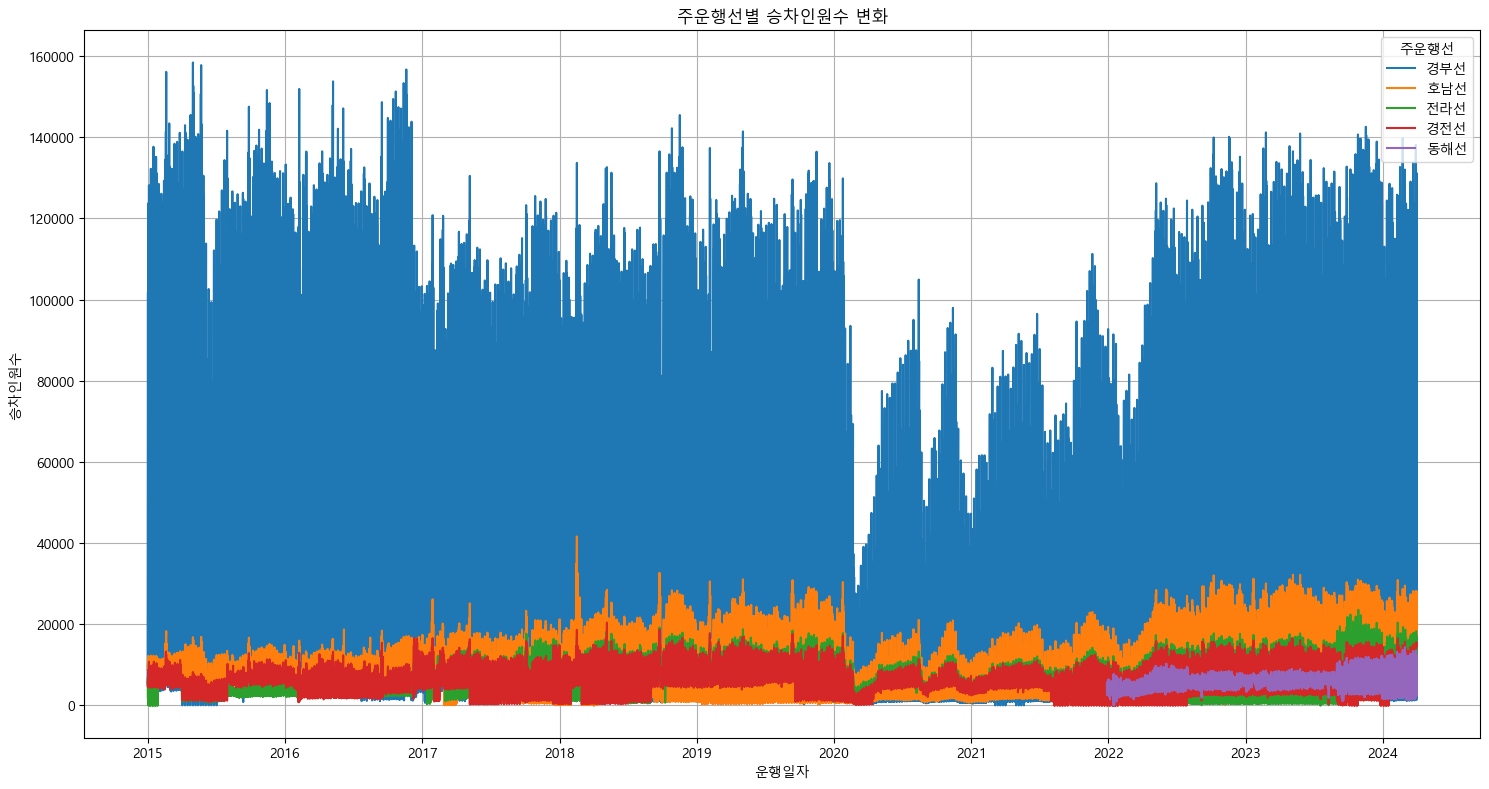

In [76]:
# 주운행선 코드 → 한글 라벨 변환
line_mapping = {
    0: '경부선',
    1: '경전선',
    2: '동해선',
    3: '전라선',
    4: '호남선'
}
filtered_df['주운행선'] = filtered_df['주운행선'].map(line_mapping)

# 주운행선별 승차인원수 시계열 시각화
plt.figure(figsize=(15, 8))

# 주운행선별 반복
for line in filtered_df['주운행선'].unique():
    subset = filtered_df[filtered_df['주운행선'] == line]  # 주운행선별 데이터 필터링
    plt.plot(subset['운행일자'], subset['승차인원수'], label=line)

# 그래프 설정
plt.title('주운행선별 승차인원수 변화')
plt.xlabel('운행일자')
plt.ylabel('승차인원수')
plt.legend(title='주운행선')
plt.grid(True)
plt.tight_layout()
plt.show()

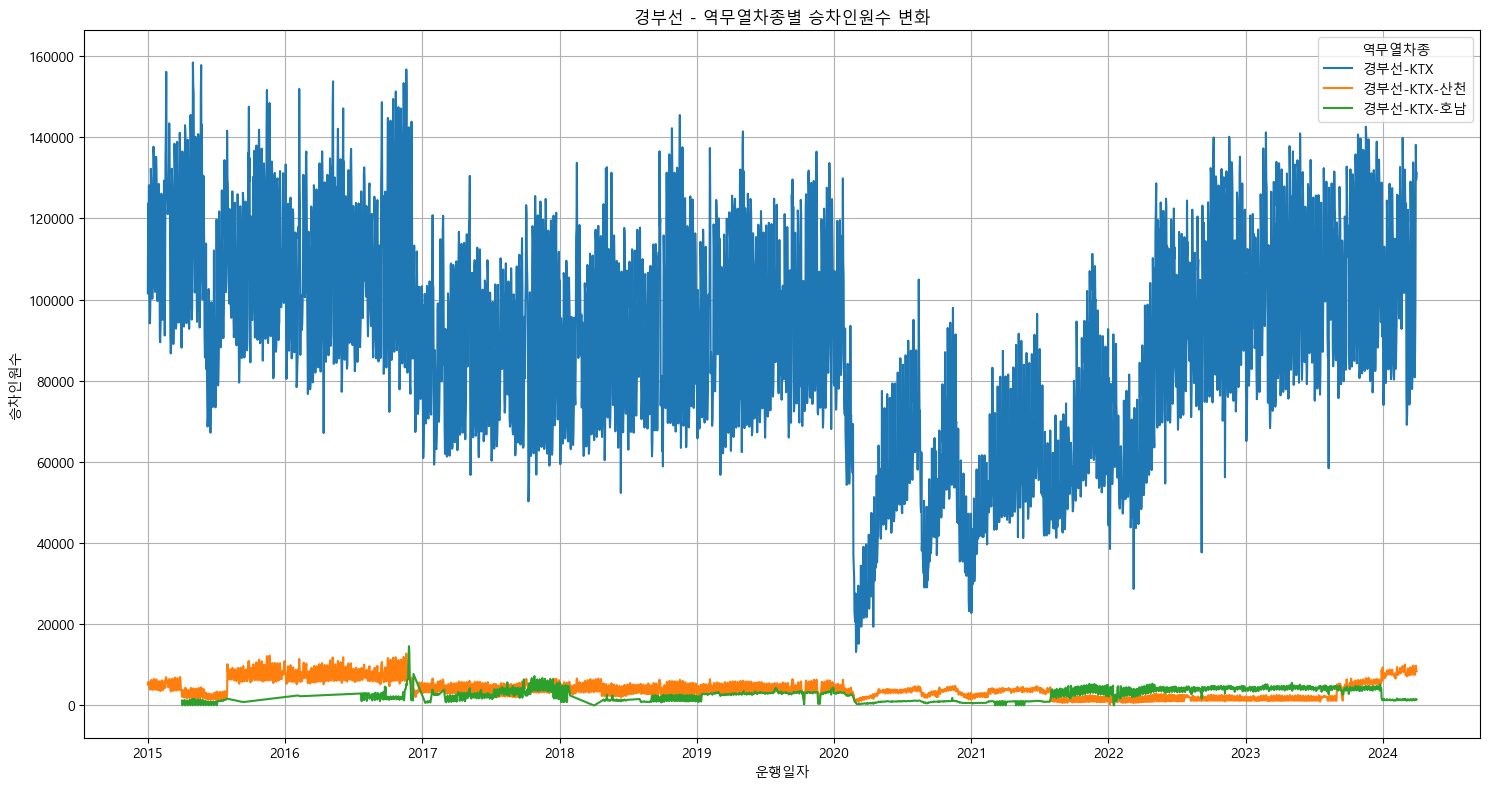

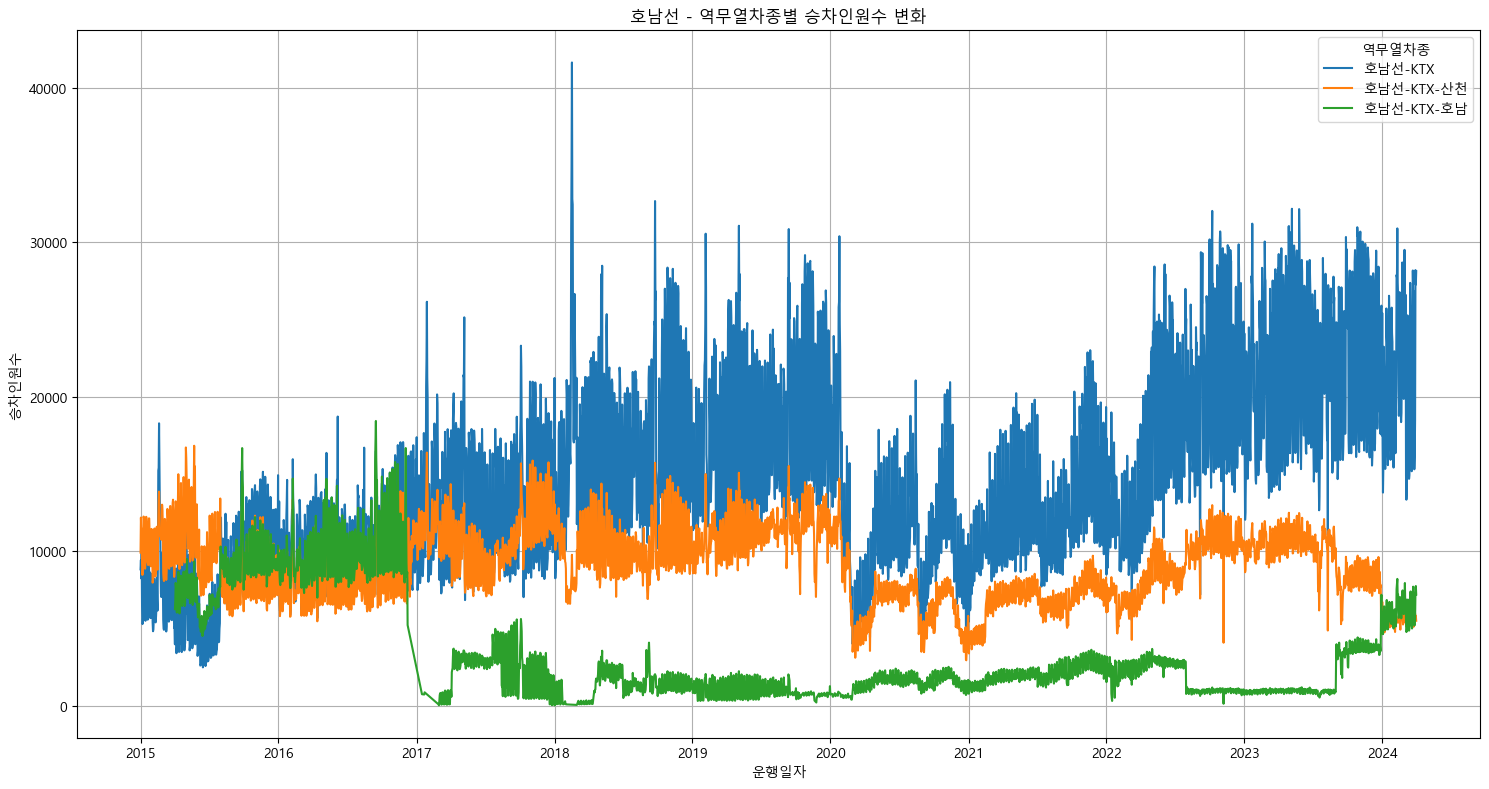

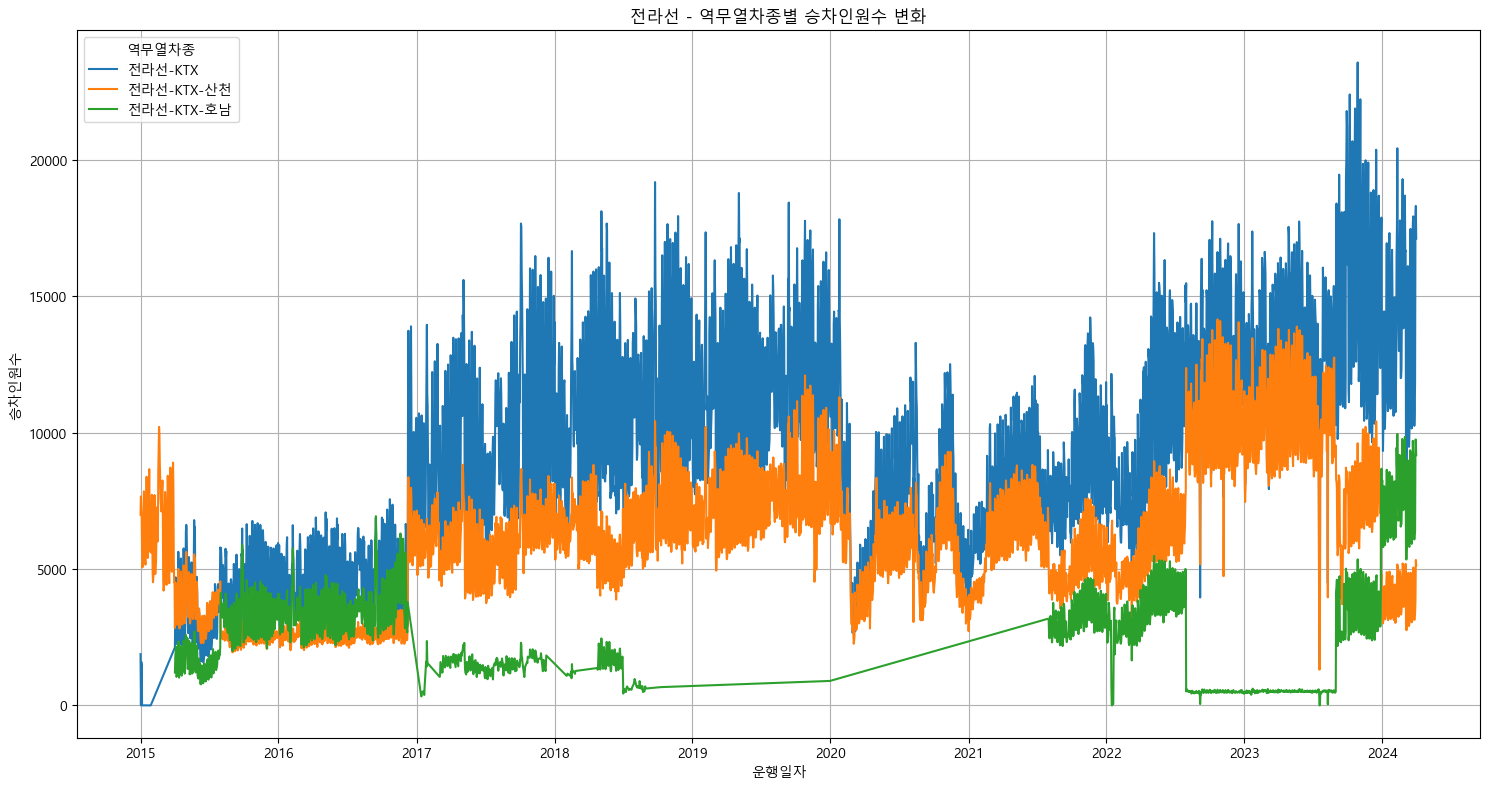

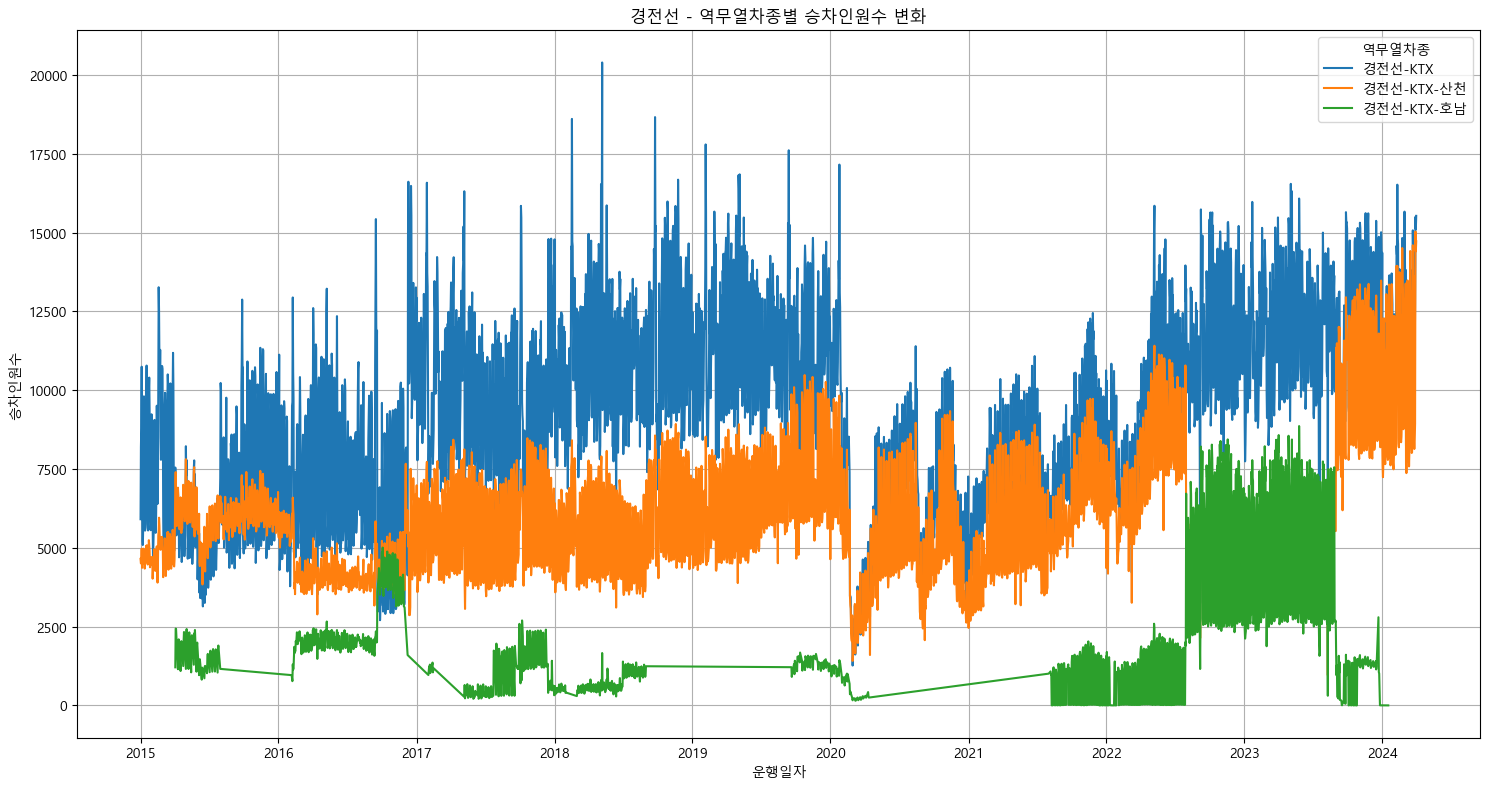

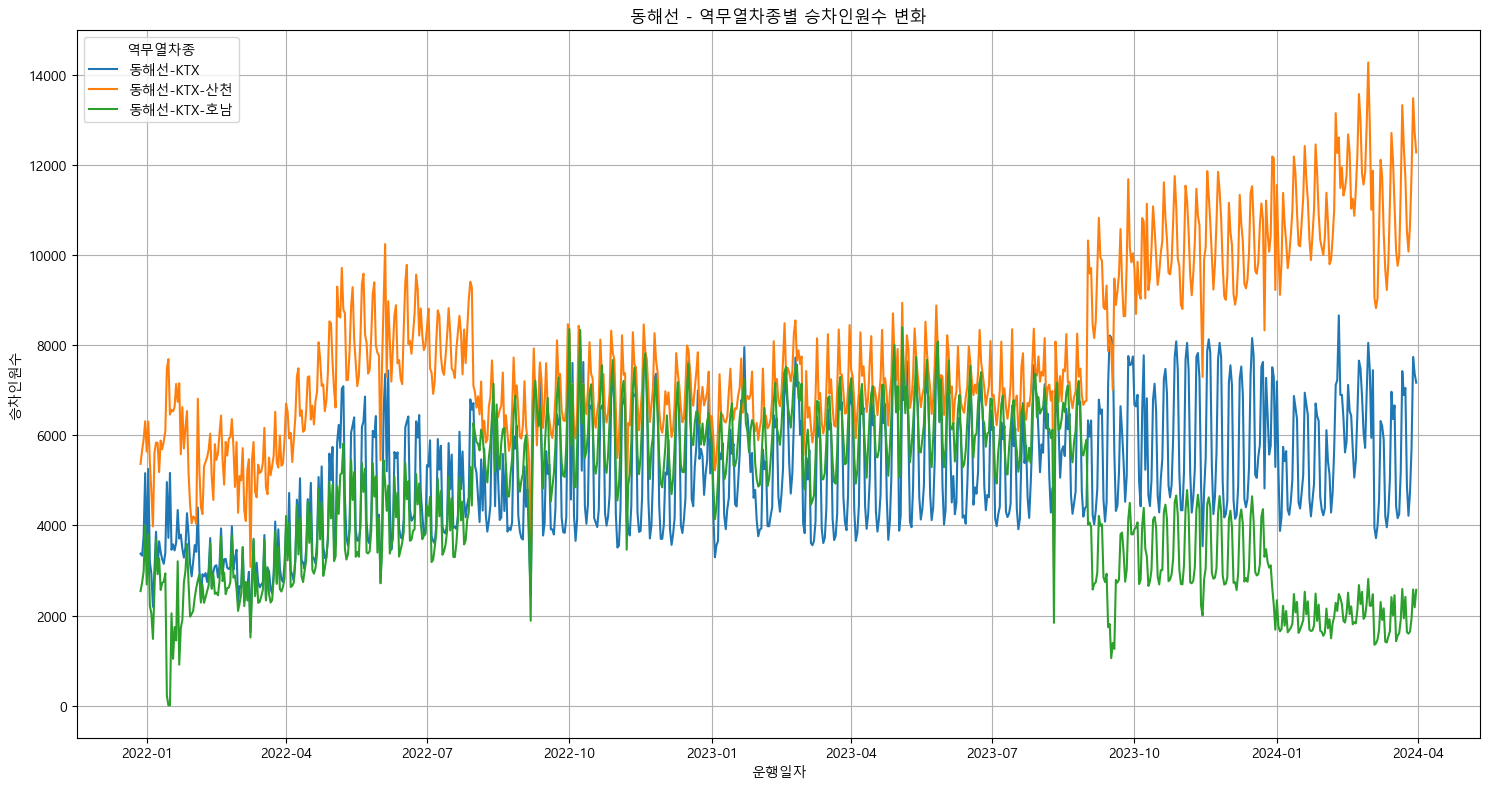

In [77]:
# 주운행선 코드 → 한글 라벨 변환
train_mapping = {
    0: 'KTX',
    1: 'KTX-산천',
    2: 'KTX-이음',
    3: 'KTX-호남'
}
filtered_df['역무열차종'] = filtered_df['역무열차종'].map(train_mapping)

for line in filtered_df['주운행선'].unique():  # 주운행선 반복
    plt.figure(figsize=(15, 8))  # 그래프 크기 설정
    
    for train in filtered_df['역무열차종'].unique():  # 역무열차종 반복
        subset = filtered_df[(filtered_df['주운행선'] == line) & (filtered_df['역무열차종'] == train)]
        plt.plot(subset['운행일자'], subset['승차인원수'], label=f'{line}-{train}')  # 주운행선-열차종 조합
    
    # 4. 그래프 설정
    plt.title(f'{line} - 역무열차종별 승차인원수 변화')
    plt.xlabel('운행일자')
    plt.ylabel('승차인원수')
    plt.legend(title='역무열차종')
    plt.grid(True)
    plt.tight_layout()
    plt.show()